## Series Temporales - Trabajo Práctico
### Alumna: Ariadna Garmendia

### Tema: Análisis de cantidad de pasajeros que pasaron por los molinetes del subte en la Ciudad Autónoma de Buenos Aires entre 2017 y 2019.

#### DESCOMPOSICIÓN CON MODELO ADITIVO Y ANÁLISIS DE ESTACIONARIEDAD

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox 
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.stattools import adfuller, acf, kpss, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scripts.import_data import data


In [5]:
molinetes, _,_,_ = data()

In [6]:
decomposed = sm.tsa.seasonal_decompose(molinetes, period=7, model='additive')

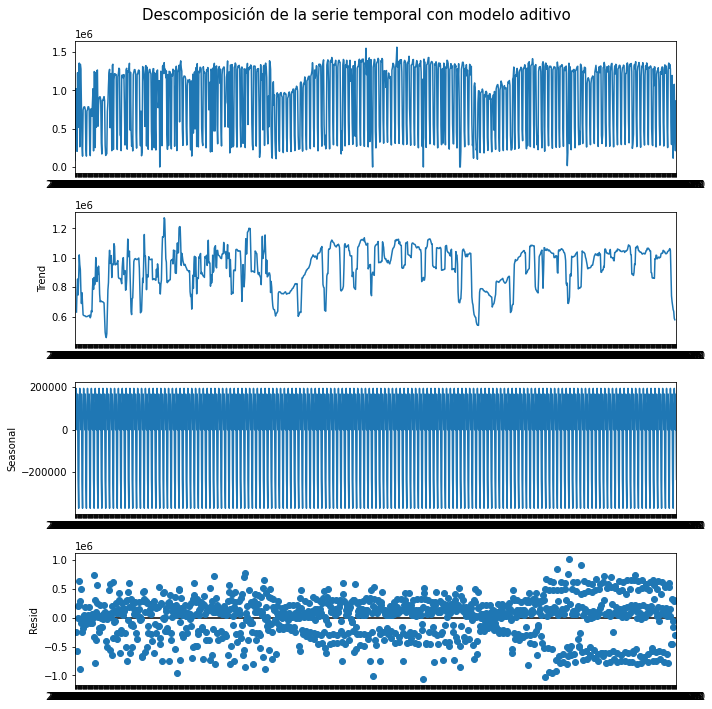

In [7]:

decomp_plot = decomposed.plot(observed=True, seasonal=True, trend=True, resid=True, weights=False)
decomp_plot.set_size_inches(10,10)
plt.suptitle("Descomposición de la serie temporal con modelo aditivo").set_fontsize(15)
plt.tight_layout()
plt.show()

### Estacionariedad

#### A simple vista, la serie no es estacionaria, se observa que la media y la varianza cambian con el tiempo. A continuación voy a hacer una evaluación formal con los métodos vistos en clase.

#### Autocorrelación y Autocorrelación Parcial 

In [8]:
acf(molinetes)

array([ 1.        ,  0.29155155, -0.17347456, -0.22164242, -0.29603802,
       -0.14258866,  0.25175606,  0.55304417,  0.23167457, -0.14104013,
       -0.26883716, -0.24764908, -0.12002898,  0.22877675,  0.52791267,
        0.18935598, -0.15241648, -0.25153701, -0.24477845, -0.1097797 ,
        0.24113639,  0.52231846,  0.20850463, -0.17515805, -0.27337951,
       -0.22147356, -0.12868694,  0.26950073,  0.57876035,  0.19086754,
       -0.14305941])

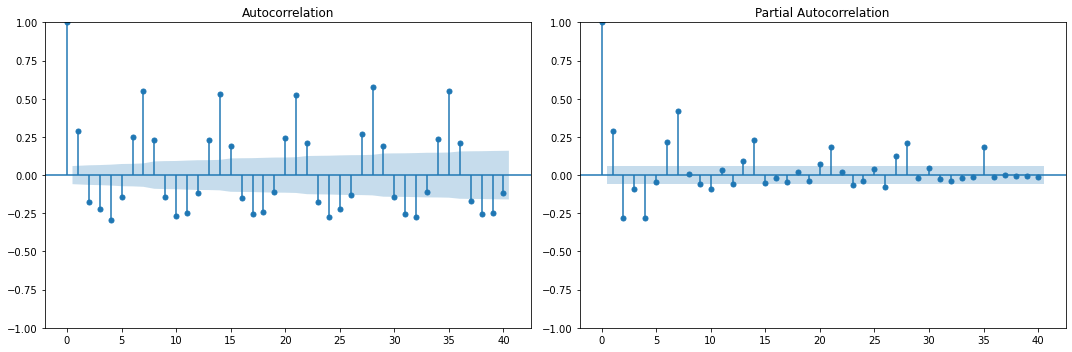

In [9]:

fig, ax = plt.subplots(1,2,figsize=(15,5))
sm.graphics.tsa.plot_acf(molinetes, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(molinetes, method='ywm', lags=40, ax=ax[1])
plt.tight_layout()
plt.show()


#### Se observa una autocorrelacción con forma cíclica. Para lags grandes la autocorrelación no alcanza valores nulos, y esto indicaría que no es estacionaria.

#### Método de Dickey-Fuller Aumentado

In [10]:
adfuller(molinetes)

(-4.712644269778308,
 7.966876063772809e-05,
 22,
 1069,
 {'1%': -3.4364819663568262,
  '5%': -2.864247479652846,
  '10%': -2.568211560046239},
 30149.87315265922)

#### El pvalor en este caso da muy pequeño (0,000079) <0,05 es decir rechazo H0 y significaría que la serie es estacionaria (que no hay caminante aleatorio) de acuerdo a este test. Sin embargo, el test considera la serie diferenciada, así que voy a usar otros tests para complementar el análisis.
 

#### Test KPSS

In [11]:
kpss(molinetes, regression='ct')
#kpss(molinetes, regression='ct', nlags=1091)

/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2002: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.06720761855372281,
 0.1,
 103,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

#### En el caso de este test, busco un pvalor grande (p_valor > 0.05 busco no rechazar H0) - el resultado muestra un pvalor = 0.1 con lo cual este test también estaría indicando que la serie es estacionaria.

#### Conclusión sobre los tests: adfuller y kpss dicen que la serie es estacionaria porque estos tests analizan otro tipo de no estacionariedad como por ejemplo debida a la presencia de caminante aleatorio y no van a detectar comportamientos cíclicos como en el caso de mi serie.